# Importing lib

## data analysis lib

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## machine learning lib

In [2]:
import sklearn as sk

## reading dataframe

In [3]:
df= pd.read_csv("housing.csv")

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## EDA - for understanding the data

## adding neend columns

In [5]:
# This is called stratified shuffle split 

df['median_income'] = np.ceil(df['median_income'] /1.5 )
df['median_income'] = df['median_income'].where(df['median_income']<5,5)

In [6]:
# df['median_income'].value_counts()

In [7]:
df['bedroom_per_peson'] = df['total_bedrooms'] / df['households']
df['rooms per person'] =  df['total_rooms'] / df['population']

## processing data for machine
converting text columns into number and one hote encoding

In [9]:
df['bedroom_per_peson'] = df['bedroom_per_peson'].fillna(df['bedroom_per_peson'].median())

In [10]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [11]:
df = pd.get_dummies(df,columns=['ocean_proximity'],drop_first=True)

## Train test split

In [12]:
x = df.drop(columns='median_house_value')
y = df['median_house_value']

In [59]:
xtrain,xtest,ytrain,ytest = sk.model_selection.train_test_split(x,y,random_state=42,test_size=0.2)

In [61]:
print("xtrain ",xtrain.shape)
print("ytrain",ytrain.shape)
print("xtest", xtest.shape)
print("ytest", ytest.shape)

xtrain  (16512, 14)
ytrain (16512,)
xtest (4128, 14)
ytest (4128,)


## Scaling the data

In [62]:
scaler = sk.preprocessing.MinMaxScaler()

In [63]:
scaled_df = scaler.fit_transform(xtrain)

## applying model

<Axes: xlabel='median_house_value', ylabel='Count'>

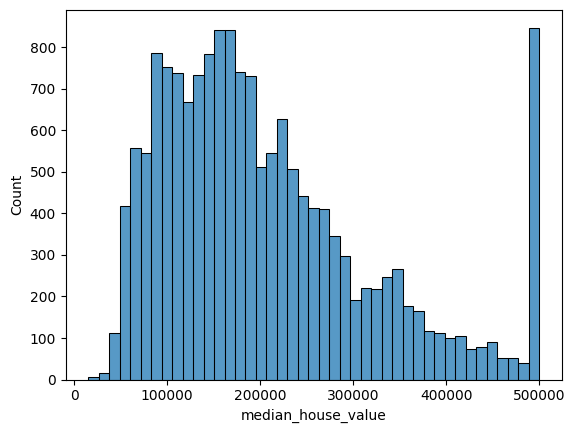

In [65]:
sns.histplot(x=ytrain)

In [66]:
ytrain = ytrain > 200000

In [67]:
ytest = ytest > 200000

In [24]:
ytr.value_counts()

median_house_value
False    9510
True     7002
Name: count, dtype: int64

In [26]:
sgdc = sk.linear_model.SGDClassifier(random_state=42)

In [27]:
sgdc.fit(xtrain,xtest)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [29]:
pred = sgdc.predict(ytrain)

In [39]:
sum(pred == ytest) / len(ytest)*100

74.10368217054264

## Implementing Cross-Validation

In [41]:
skfold = sk.model_selection.StratifiedKFold(shuffle=True,random_state=42)

In [53]:
 list(skfold.split(xtrain,ytrain))

ValueError: Found input variables with inconsistent numbers of samples: [16512, 4128]